In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import make_regression

In [4]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,random_state=13,noise=20)

In [5]:
x

array([[-0.71239066],
       [-0.43714566],
       [-0.45375238],
       [ 0.95283061],
       [ 0.23785784],
       [ 0.86121137],
       [-0.24332625],
       [ 0.18494595],
       [-0.72099967],
       [-0.42989708],
       [ 2.01522083],
       [ 0.39724133],
       [ 0.20780005],
       [-0.23242587],
       [-0.76862702],
       [ 0.45315861],
       [ 0.63988397],
       [ 0.3595323 ],
       [-1.61510796],
       [ 1.74924179],
       [-0.78898902],
       [-0.51196509],
       [-0.92833523],
       [ 2.15038297],
       [-0.2073497 ],
       [-1.63909341],
       [-0.33861825],
       [-0.32212366],
       [-0.48137142],
       [-0.52316421],
       [ 0.72196506],
       [ 0.76591105],
       [ 0.45348104],
       [-1.26160595],
       [-2.18711527],
       [-1.18541881],
       [ 0.21745166],
       [ 1.33031692],
       [-1.08718159],
       [ 0.56226171],
       [-1.51284512],
       [-0.00238903],
       [-0.27813452],
       [ 0.45181234],
       [ 1.19070527],
       [ 0

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import  Ridge

In [7]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [8]:
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [9]:
# by ridge
ridge=Ridge(alpha=10)
ridge.fit(x,y)

Ridge(alpha=10)

In [10]:
print(ridge.coef_)
print(ridge.intercept_)

[24.9546267]
-2.1269130035235735


In [11]:
ridge1=Ridge(alpha=100)
ridge1.fit(x,y)
print(ridge1.coef_)
print(ridge1.intercept_)


[12.93442104]
-1.4248441496033308


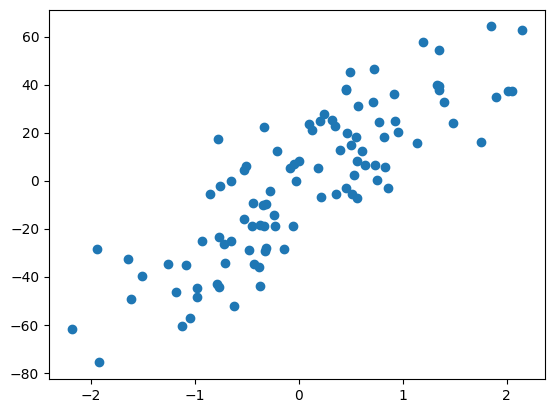

In [12]:
plt.scatter(x,y)

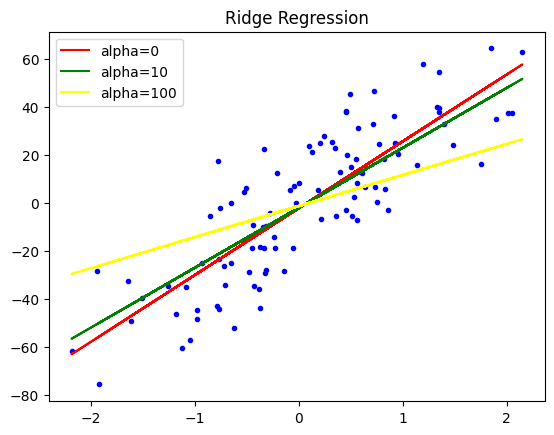

In [14]:
plt.plot(x,y,'b.')
plt.plot(x,lr.predict(x),color='red',label='alpha=0')
plt.plot(x,ridge.predict(x),color='green',label='alpha=10')
plt.plot(x,ridge1.predict(x),color='yellow',label='alpha=100')
plt.legend()
plt.title('Ridge Regression')
plt.show()

# we know that for 2d data y=mx+b

m=sum of (yi-y.mean())* (xi-x.mean())/sum of (xi-x.mean())^2

b=y.mean()-m.x.mean()

but in ridge regreesion we add some hyperparameter lambda=alpha so

**m=sum of (yi-y.mean()).(xi-x.mean())/sum of (xi-x.mean())^2 + lamda**

**b=y.mean()-m.x.mean()**


In [15]:
class MeraRidge:

    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None

    def fit(self,x_train,y_train):
        num=0
        den=0

        for i in range(x_train.shape[0]):
            num=num+((y_train[i]-y_train.mean())*(x_train[i]-x_train.mean()))
            den=den+((x_train[i]-x_train.mean())*(x_train[i]-x_train.mean()))

        self.m=num/(den+self.alpha)
        self.b=y_train.mean()-(self.m*x_train.mean())

        print(self.m)
        print(self.b)

    def predict(self,x_test):
      return self.m*x_test+self.b

In [18]:
mr=MeraRidge(alpha=100)

In [19]:
mr.fit(x,y)

[12.93442104]
[-1.42484415]
